In [1]:
pip install numpy pandas matplotlib scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Show shape and first few rows
print("Shape:", X.shape)
print("Classes:", iris.target_names)


Shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
k_values = range(1, 11)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k} → Accuracy: {acc:.2f}")


K=1 → Accuracy: 0.97
K=2 → Accuracy: 1.00
K=3 → Accuracy: 1.00
K=4 → Accuracy: 1.00
K=5 → Accuracy: 1.00
K=6 → Accuracy: 1.00
K=7 → Accuracy: 1.00
K=8 → Accuracy: 1.00
K=9 → Accuracy: 1.00
K=10 → Accuracy: 1.00


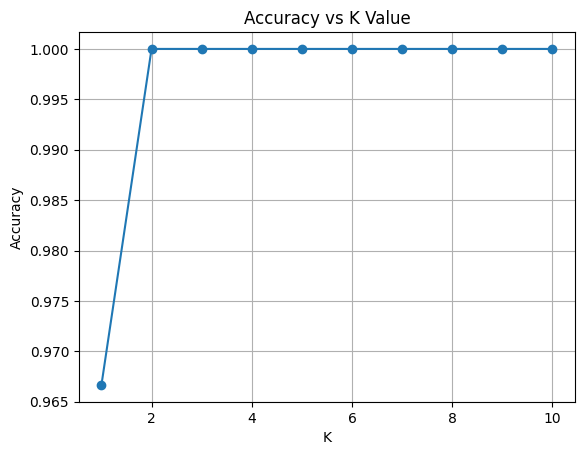

In [8]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Final Accuracy: 1.0


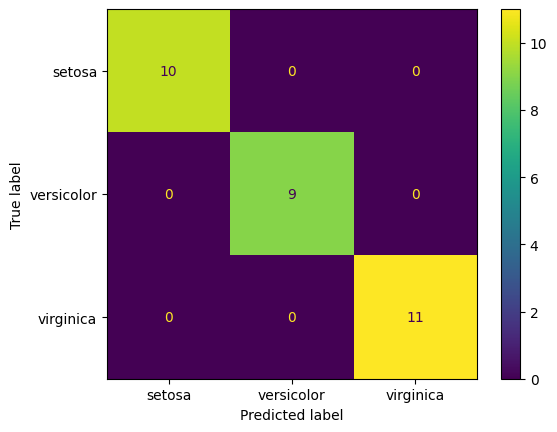

In [9]:
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Final Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot()
plt.show()
